
# Market Basket Analysis of Groceries Data in Python

## Introduction

**Market Basket Analysis (MBA)** is a data mining technique used to uncover associations between items by analyzing customer purchasing behavior. It identifies patterns of items often purchased together. These patterns are valuable for various business strategies like cross-selling, up-selling, and promotional offers.

In this project, I will apply MBA to a dataset from a grocery e-commerce site. The goal is to understand customer purchasing behavior and provide insights to improve sales and customer satisfaction.

1. **Identify patterns** in consumer decision-making with the `mlxtend` package.
2. Use metrics to **evaluate the properties** of patterns.
3. Construct "**rules**" that provide concrete recommendations for businesses.
4. **Visualize patterns and rules** using `seaborn` and `matplotlib`.

## Dataset

The dataset I'll be using is `Groceries_dataset.csv`, which contains the following columns:

- `Member_number`: ID of the member or customer who bought an item.
- `Date`: The date the item was bought.
- `itemDescription`: Name of the item bought.


## Import and Load required packages

In [66]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default asthetic parameters.
sns.set()

## Data Preparation and Exploratory Data Analysis (EDA)

- Load the dataset and prepare it for analysis. Involves cleaning the data, handling missing values, and transforming the data into a suitable format for MBA.

- Understand the data by summarizing its main characteristics.

In [67]:
# Define path to data.
data_path = "C:\\Users\\Nasimiyu\\Documents\\Market Basket Analysis - Groceries_dataset.csv"

# Convert dataset to pandas Dataframe
groceries_df = pd.read_csv(data_path)

# Dispaly first 5 rows in groceries_df
display(groceries_df.head(5))

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [68]:
# Print number of rows and columns in the groceries_df
groceries_df.shape

(38765, 3)

In [69]:
# Print groceries_df info
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [70]:
# Convert date column to datetime data type
groceries_df['Date'] = pd.to_datetime(groceries_df['Date'], format='%d-%m-%Y')

In [71]:
# Print groceries_df info
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [72]:
# Display unique items in the itemDescription column
display(groceries_df['itemDescription'].unique())

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [73]:
# Count the frequency of each item in the itemDescription column
uniqueitems = groceries_df['itemDescription'].value_counts().reset_index(name='count')
uniqueitems

,itemDescription,count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,kitchen utensil,1


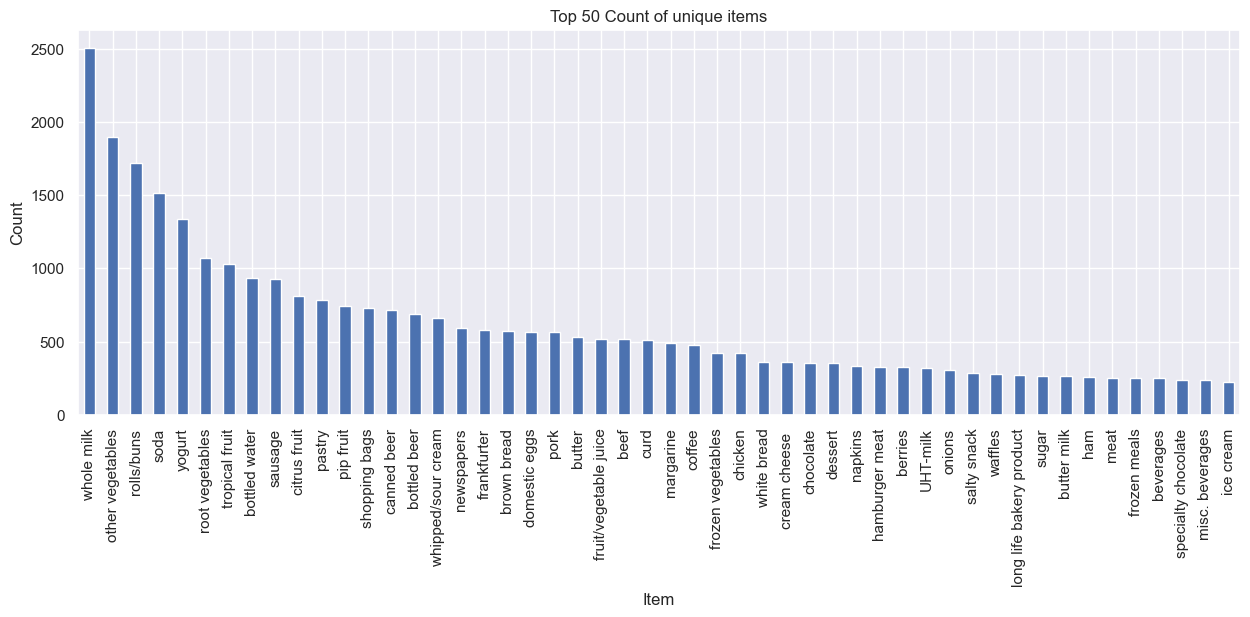

In [74]:
# Plot the top 50 items
# Sort the uniqueitems dataframe by count in descending order
uniqueitems_sorted = uniqueitems.sort_values('count', ascending=False)

# Plot the top 50 items
plt.figure(figsize=(15,5))
uniqueitems_sorted['count'][:50].plot(kind='bar')
plt.title('Top 50 Count of unique items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(range(50), uniqueitems_sorted['itemDescription'][:50])
plt.show()


In [75]:
# Print the number of unique Member number in the Member_number column
print(len(groceries_df['Member_number'].unique()))

3898


In [76]:
# Print the number of unique dates in the Date column
print(len(groceries_df['Date'].unique()))

728


## Creating Transactions

- **Item**: An item refers to a product purchased from the store. In the `groceries_df` DataFrame, an item is represented by the 'itemDescription' column.


- **Itemset**: An itemset is a collection of one or more items. In the code block below, I aggregated 'itemDescription' into a list for each group of 'Member_number' and 'Date'. This list can be considered as an itemset, representing a collection of items bought in each transaction.


- **Transaction**: A transaction refers to an itemset that corresponds to a customer's order. It represents a single shopping event in which a customer purchases one or more items together. In the analysis, each row in the `transactions` DataFrame represents a unique transaction, which is created by grouping the `groceries_df` DataFrame by 'Member_number' and 'Date' and aggregating the 'itemDescription' into a list.


In [77]:
# Group by 'Member_number' and 'Date', then aggregate 'itemDescription' into a list
transactions = groceries_df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(
    name='items_in_transaction')

# Print the first 5 rows in the transactions dataframe
display(transactions.head(5))

,Member_number,Date,items_in_transaction
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


In [78]:
# Display the number of rows and columns in the transactions dataframe
transactions.shape

(14963, 3)

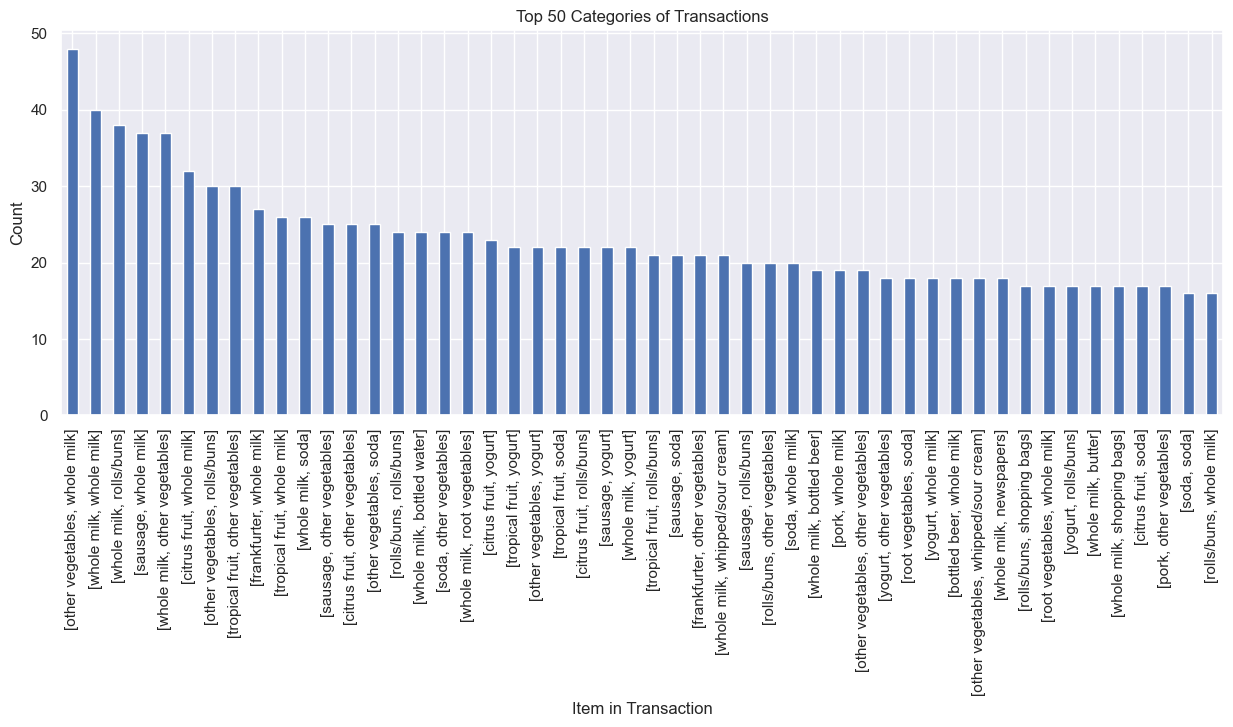

In [79]:
# Get the counts of unique values in the 'itemDescription' column
item_counts = transactions['items_in_transaction'].value_counts()

# Plot the top 50 categories
plt.figure(figsize=(15,5))
item_counts[:50].plot(kind='bar')
plt.title('Top 50 Categories of Transactions')
plt.xlabel('Item in Transaction')
plt.ylabel('Count')
plt.show()


# Association Rules and Metrics

1. **Association Rule**: An association rule is an "if-then" relationship between two itemsets. For example, the rule `if {rolls/buns} then {whole milk}` suggests that if a customer buys rolls/buns, they are likely to also buy whole milk. In this rule, 'rolls/buns' is the antecedent and 'whole milk' is the consequent.

2. **Metric**: A metric is a measure of the strength of association between two itemsets. For the rule `if {rolls/buns} then {whole milk}`, we can calculate various metrics such as support and leverage to evaluate the strength and significance of this rule.

In Market Basket Analysis, several metrics are used to evaluate the strength and significance of the association rules generated from the analysis. Here are some key metrics:

- **Support**: This measures how frequently a group of items occur together as a percentage of your store's transactions. It's the proportion of transactions in the dataset that contain the itemset. For the rule `if {rolls/buns} then {whole milk}`, the support would be the number of transactions containing both `rolls/buns` and `whole milk` divided by the total number of transactions.

    Formula: `Support({rolls/buns, whole milk}) = (Transactions containing both {rolls/buns and whole milk}) / (Total Transactions)`

- **Confidence**: This is the ratio between transactions that include the combination of items versus transactions that only contain a single item from the set. It's the probability of seeing the consequent in a transaction given that it also contains the antecedent. For the rule `if {rolls/buns} then {whole milk}`, the confidence would be the number of transactions containing both `rolls/buns` and `whole milk` divided by the number of transactions containing `rolls/buns`.

    Formula: `Confidence({rolls/buns} -> {whole milk}) = (Transactions containing both {rolls/buns and whole milk}) / (Transactions containing {rolls/buns})`

- **Lift**: This measures how well your predictions match real-world results. It's the ratio of the observed support to that expected if the antecedent and consequent were independent. For the rule `if {rolls/buns} then {whole milk}`, the lift would be the support of transactions containing both `rolls/buns` and `whole milk` divided by the product of the support for `rolls/buns` and the support for `whole milk`.

    Formula: `Lift({rolls/buns} -> {whole milk}) = Support({rolls/buns, whole milk}) / (Support({rolls/buns}) * Support({whole milk}))`

- **Leverage**: This measures the difference between the observed frequency of the antecedent and consequent appearing together and the frequency that would be expected if they were independent. For the rule `if {rolls/buns} then {whole milk}`, the leverage would be the support of transactions containing both `rolls/buns` and `whole milk` minus the product of the support for `rolls/buns` and the support for `whole milk`.

    Formula: `Leverage({rolls/buns} -> {whole milk}) = Support({rolls/buns, whole milk}) - (Support({rolls/buns}) * Support({whole milk}))`
    
- **Zhangs metric**: The Zhang metric is an extension of the Lift metric and is mainly used to measure the disassociation between items. It ranges between -1 and 1, with positive values indicating association and negative values indicating disassociation.

    Formula: `Zhangs_metric({rolls/buns}->{whole milk}) = (Support({rolls/buns} U {whole milk}) -Support({rolls/buns})*Support({whole milk}))/(1 — Support({rolls/buns})*Support({whole milk}))`

# One-hot Encoding the Transaction Data

One-hot encoding is a process of converting categorical data into a format that could be provided to ML algorithms to improve predictions. With one-hot, I converted each categorical value into a new categorical value and assign a binary value of 1 or 0. 

- True: Indicates that a particular categorical value is present for a given observation. This is represented as ‘1’ in a typical one-hot encoding schema.

- False: Indicates that a particular categorical value is not present for a given observation. This is represented as ‘0’ in a typical one-hot encoding schema.

Here's how you can one-hot encode the transaction data:

1. **Import the Necessary Module**: First, I need to import the `TransactionEncoder` module from `mlxtend.preprocessing`.

2. **Instantiate an Encoder Object**: TransactionEncoder() instantiates an encoder object.

3. **Fit the Encoder**: .fit() creates a mapping between the list and one-hot encoding. In this case, I will be fitting the encoder to the ‘items_in_transaction’ column of the ‘transactions’ DataFrame.

4. **Transform the List into One-hot Encoded Array**: .transform() transforms the list into a one-hot encoded array. I then convert this array into a DataFrame.

The columns correspond to item categories and the rows correspond to transactions. One-hot encoding simplifies the computation of metrics. I will also use the one-hot encoded DataFrame as an input to different mlxtend functions.


In [80]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder
encoder = TransactionEncoder()

# Fit and transform the transactions into a one-hot encoded DataFrame
onehot = encoder.fit(transactions['items_in_transaction']).transform(transactions['items_in_transaction'])
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

display(onehot_df.head(5))

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
# Print distribution of item counts.
onehot_df.sum(axis=1).value_counts()

2     10012
3      2727
4      1273
5       338
1       205
6       179
7       113
8        96
9        19
10        1
Name: count, dtype: int64

# The Apriori Algorithm and Pruning

The Apriori algorithm identifies frequent (high support) itemsets using something called the Apriori principle, which states that a superset that contains an infrequent item is also infrequent.

Pruning is the process of removing itemsets or association rules, typically based on the application of a metric threshold.

The `mlxtend` module will be used to apply the Apriori algorithm, perform pruning, and compute association rules.

## Applying the Apriori algorithm

Used `apriori()` to identify frequent itemsets. `min_support` set the item frequency threshold used for pruning.

## Computing association rules from Apriori output

Used `association_rules()` to compute and prune association rules from output of `apriori()`.

In [82]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with a three-item limit.
frequent_itemsets = apriori(onehot_df, min_support = 0.001, max_len = 3, use_colnames = True)
display(frequent_itemsets)

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(sausage, whole milk, rolls/buns)"
746,0.001002,"(soda, whole milk, rolls/buns)"
747,0.001337,"(yogurt, whole milk, rolls/buns)"
748,0.001069,"(sausage, whole milk, soda)"


In [83]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.0)

# Print the rule
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009,-0.236873
...,...,...,...,...,...,...,...,...,...,...
1233,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
1234,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
1235,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727
1236,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,0.576701


The above code is generating association rules from the frequent itemsets that were generated using the Apriori algorithm. It uses the “support” metric to evaluate the significance of the rules and only returns rules that have a minimum threshold of support equal to 0.

Next I used **Zhang’s metric** to evaluate the strength of association rules. It ranges from -1 to 1

- A **positive Zhang’s metric** indicates a positive relationship between the antecedent and the consequent, meaning that the presence of the antecedent increases the probability of the consequent.

- A **negative Zhang’s metric** indicates a negative relationship, meaning that the presence of the antecedent decreases the probability of the consequent.

Filtered the rules with a negative zhang’s metric in order to find disassociation between the items.
- Rules with a negative Zhang’s metric can also be informative as they indicate items that are unlikely to be purchased together. This information can be useful for avoiding ineffective marketing strategies.


In [84]:
disassociated_rules = rules[rules['zhangs_metric'] <= 0]
disassociated_rules.sort_values(by = 'zhangs_metric', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
149,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
148,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
863,(newspapers),(pastry),0.038896,0.051728,0.002005,0.051546,0.996497,-0.000007,0.999809,-0.003644
862,(pastry),(newspapers),0.051728,0.038896,0.002005,0.038760,0.996497,-0.000007,0.999858,-0.003693
112,(domestic eggs),(bottled beer),0.037091,0.045312,0.001671,0.045045,0.994114,-0.000010,0.999721,-0.006112
...,...,...,...,...,...,...,...,...,...,...
57,(tropical fruit),(beef),0.067767,0.033950,0.001136,0.016765,0.493817,-0.001165,0.982522,-0.523709
48,(beef),(rolls/buns),0.033950,0.110005,0.001604,0.047244,0.429474,-0.002131,0.934127,-0.578968
49,(rolls/buns),(beef),0.110005,0.033950,0.001604,0.014581,0.429474,-0.002131,0.980344,-0.598817
468,(citrus fruit),(sausage),0.053131,0.060349,0.001203,0.022642,0.375177,-0.002003,0.961419,-0.637531


Next, I'm interested in rules that indicate a strong positive relationship between items. I Ifiltered for rules with a **positive Zhang’s metric**.

In [85]:
rules = rules[rules['zhangs_metric'] > 0]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
13,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
22,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
23,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
28,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012,0.000369
...,...,...,...,...,...,...,...,...,...,...
1233,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,7.967480e-04,1.082219,0.548014
1234,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,7.012151e-04,1.093681,0.481231
1235,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,7.012151e-04,1.008307,0.521727
1236,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,7.967480e-04,1.013532,0.576701


<Axes: xlabel='support', ylabel='confidence'>

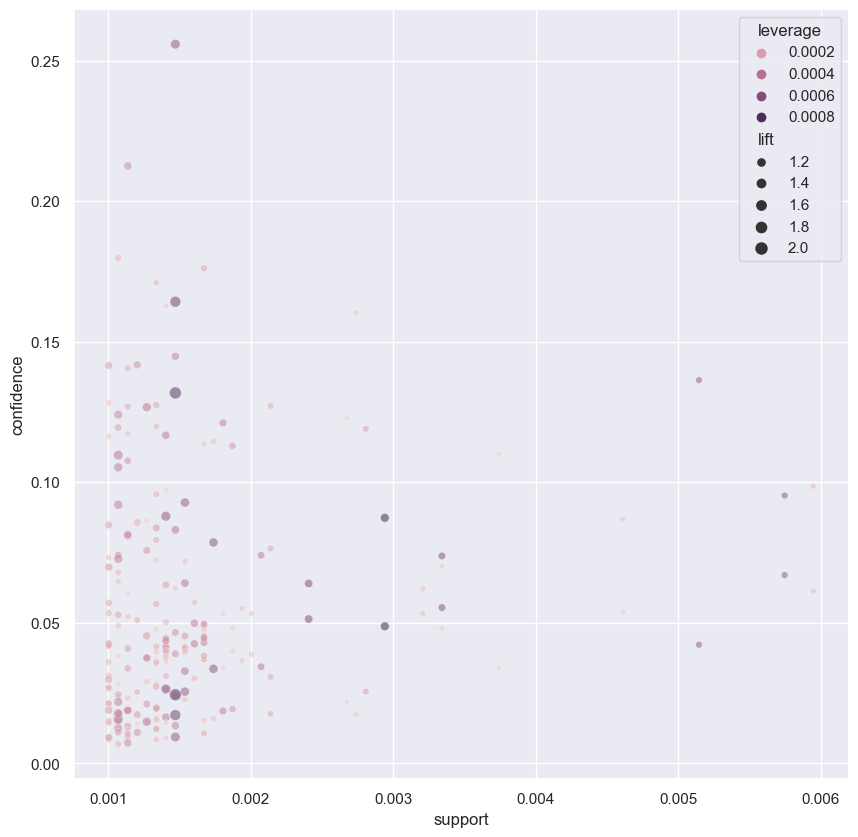

In [86]:
# Plot a scatter plot
plt.figure(figsize = (10, 10))

sns.scatterplot(x="support", y="confidence",size="lift", hue="leverage", alpha=0.5, data=rules)

# Interpreting a Scatter Plot for Market Basket Analysis

In a scatter plots for market basket analysis, the points represent rules derived from the analysis. Here's how we interpret the scatter plot:

## 1. Axes
- The x and y axes represent different metrics used in market basket analysis. In this case, "support" and "confidence" are on the axes. Support measures how frequently a rule appears in the data, while confidence measures how often items in Y appear in transactions that contain X. 

## 2. Points
- Each point on the scatter plot represents a rule. The position of the point corresponds to the values of the metrics for that rule. For example, a point located at (0.2, 0.8) on the "support" vs "confidence" plot would represent a rule with a support of 0.2 and a confidence of 0.8.

## 3. Size of Points
- The size of the points can represent another metric. In this case, the size of the points represents the "lift" of the rules. Lift is a measure of the performance of a rule over the random expectation. A larger point would represent a rule with a higher lift.

## 4. Color of Points
- The color of the points can represent another metric. In this case, the color of the points represents the "leverage" of the rules. Leverage provides a comparison of the rule's support to the support expected if the antecedent and consequent were independent. A higher leverage value indicates a stronger association between the antecedent and consequent.


In [87]:
# Filter rules with confidence metric
rules = rules[(rules['confidence'] > 0.13)]
rules.sort_values(by = 'support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
630,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
728,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
1108,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
1022,(processed cheese),(rolls/buns),0.010158,0.110005,0.001470,0.144737,1.315734,0.000353,1.040610,0.242430
1232,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
1233,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
1234,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
584,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814,0.030162
1221,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751
956,(packaged fruit/vegetables),(rolls/buns),0.008488,0.110005,0.001203,0.141732,1.288421,0.000269,1.036967,0.225772


                    antecedents       consequents
584                   detergent        whole milk
630                 frankfurter  other vegetables
728                         ham        whole milk
956   packaged fruit/vegetables        rolls/buns
1022           processed cheese        rolls/buns
1036          seasonal products        rolls/buns
1108        semi-finished bread        whole milk
1186           soda, rolls/buns  other vegetables
1209        sausage, rolls/buns        whole milk
1221         yogurt, rolls/buns        whole milk
1227              sausage, soda        whole milk
1232            yogurt, sausage        whole milk
1233         yogurt, whole milk           sausage
1234        sausage, whole milk            yogurt


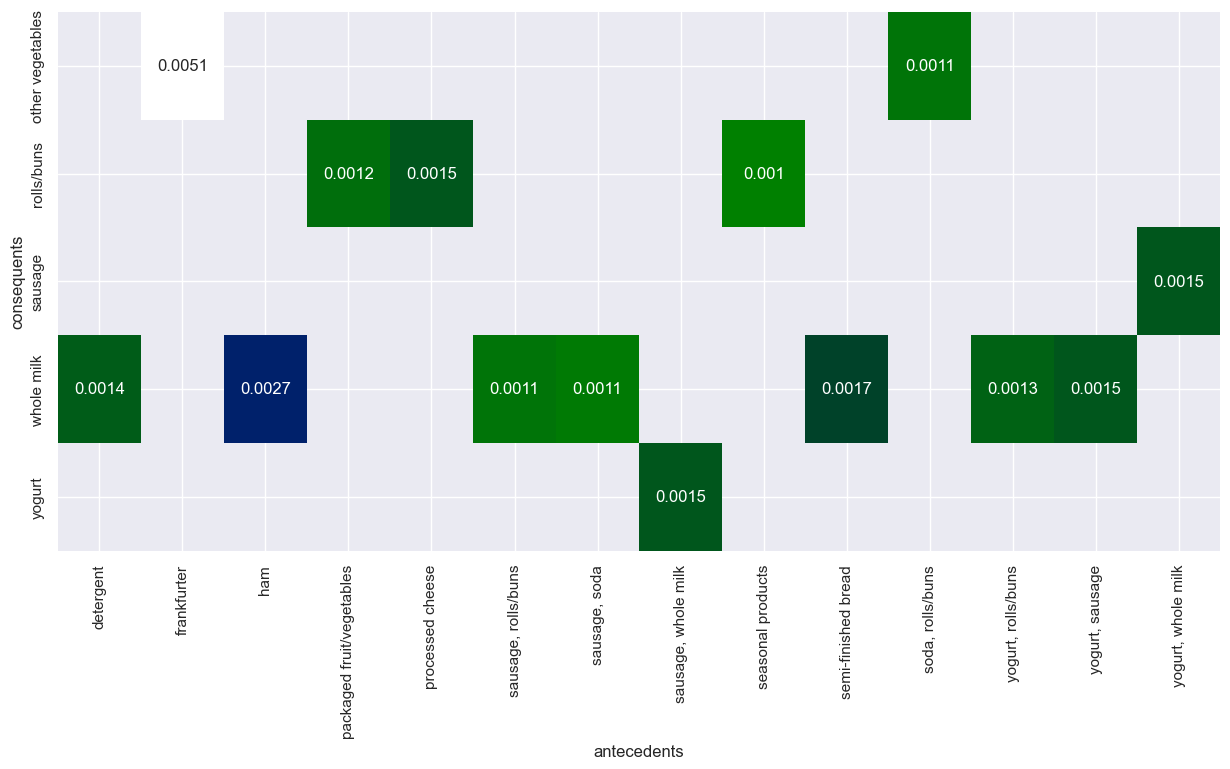

In [88]:
# Convert antecedents and consequents into strings
rules_copy = rules.copy()
rules_copy['antecedents'] = rules_copy['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_copy['consequents'] = rules_copy['consequents'].apply(lambda a: ', '.join(list(a)))

# Print the 'antecedents' and 'consequents' columns of the DataFrame
print(rules_copy[['antecedents', 'consequents']])

# Transform 'antecedents', 'consequents', and 'support' columns into a matrix
support_table = rules_copy.pivot(index='consequents', columns='antecedents', values='support')

# Generate a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.show()

## Interpretation

- Each cell in the heatmap corresponds to a rule, with the antecedent as the column and the consequent as the row.
- The value annotated in each cell represents the 'support' value of the corresponding rule. The 'support' value measures how frequently the antecedent and consequent appear together in the dataset.

By examining these 'support' values, you can easily identify which combinations of items have high support (i.e., are frequently purchased together). 

## Insight

- The items 'frankfurter', 'ham', 'semi-finished bread', 'processed cheese', 'whole milk, yogurt', 'whole milk, sausage', 'yogurt, sausage', 'detergent', 'rolls/buns, yogurt', 'packaged fruit/vegetables', 'rolls/buns, soda', 'rolls/buns, sausage', 'soda, sausage', and 'seasonal products' are frequently purchased with their corresponding items. This is indicated by the high support values for these rules. 

- The confidence values for these rules are also relatively high, meaning that when the antecedent item is purchased, the consequent item is also likely to be purchased.

Based on these insights, a possible strategy could be to place these items near each other in the store to encourage customers to purchase them together. Additionally, promotional strategies could be developed around these popular items to increase sales. 